# Chicago Food Inspections data Analysis

Author: Promise Ekeh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the Data Set: Chicago Food Inspections
Link: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). For descriptions of the data elements included in this set, go to http://bit.ly/tS9IE8

Note about 7/1/2018 change to food inspection procedures that affects the data in this dataset: http://bit.ly/2yWd2JB

Disclaimer: Attempts have been made to minimize any and all duplicate inspection reports. However, the dataset may still contain such duplicates and the appropriate precautions should be exercised when viewing or analyzing these data. The result of the inspections (pass, pass with conditions or fail) as well as the violations noted are based on the findings identified and reported by the inspector at the time of the inspection, and may not reflect the findings noted at other times. For more information about Food Inspections, go to https://www.cityofchicago.org/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html.

Columns in this Dataset

| Column Name     | Description       | Type       |
|-----------------|-------------------|------------|
| Inspection ID   |                   | Number     |
| DBA Name        | Doing Business As | Plain Text |
| AKA Name        | Also Known As     | Plain Text |
| License #       |                   | Number     |
| Facility Type   |                   | Plain Text |
| Risk            |                   | Plain Text |
| Address         |                   | Plain Text |
| City            |                   | Plain Text |
| State           |                   | Plain Text |
| Zip             |                   | Number     |
| Inspection Date |                   | Date&Time  |
| Results         |                   | Plain Text |
| Violations      |                   | Plain Text |
| Latitude        |                   | Number     |
| Longitude       |                   | Number     |
| Location        |                   | Location   |

### Load the data

In [2]:
df = pd.read_csv('data/Food_Inspections.csv')

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2594986,PIZZA CANTINA,PIZZA CANTINA,2823325.0,Restaurant,Risk 1 (High),1711-1713 W 18th ST,CHICAGO,IL,60608.0,05/21/2024,Non-Inspection,No Entry,NaN,41.857639,-87.669270,"(41.85763895469841, -87.66927041464031)"
1,2594957,MELODY CPC,MELODY CPC,3244705.0,School,Risk 1 (High),3905 W Wilcox St (132S),CHICAGO,IL,60624.0,05/21/2024,Canvass,Pass,NaN,41.878788,-87.723437,"(41.87878796016008, -87.72343698528982)"
2,2594951,MIDWEST COAST BREWING COMPANY,MIDWEST COAST BREWING COMPANY,2944132.0,Liquor,Risk 3 (Low),2137 W WALNUT ST FL 1,CHICAGO,IL,60612.0,05/21/2024,License,Pass,NaN,41.885689,-87.680693,"(41.88568902451257, -87.68069272773317)"
3,2594942,TAQUERIA EL HEREDERO II,TAQUERIA EL HEREDERO II,2917665.0,Restaurant,Risk 3 (Low),3619 W NORTH AVE,CHICAGO,IL,60647.0,05/21/2024,License,Pass,NaN,41.909874,-87.717533,"(41.90987366752682, -87.7175328988882)"
4,2594939,MIDWEST COAST BREWING COMPANY,MIDWEST COAST BREWING COMPANY,2665230.0,BREWERY,Risk 3 (Low),2137 W WALNUT ST FL 1,CHICAGO,IL,60612.0,05/21/2024,Canvass Re-Inspection,Pass,NaN,41.885689,-87.680693,"(41.88568902451257, -87.68069272773317)"


In [4]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2594986,PIZZA CANTINA,PIZZA CANTINA,2823325.0,Restaurant,Risk 1 (High),1711-1713 W 18th ST,CHICAGO,IL,60608.0,05/21/2024,Non-Inspection,No Entry,NaN,41.857639,-87.669270,"(41.85763895469841, -87.66927041464031)"
1,2594957,MELODY CPC,MELODY CPC,3244705.0,School,Risk 1 (High),3905 W Wilcox St (132S),CHICAGO,IL,60624.0,05/21/2024,Canvass,Pass,NaN,41.878788,-87.723437,"(41.87878796016008, -87.72343698528982)"
2,2594951,MIDWEST COAST BREWING COMPANY,MIDWEST COAST BREWING COMPANY,2944132.0,Liquor,Risk 3 (Low),2137 W WALNUT ST FL 1,CHICAGO,IL,60612.0,05/21/2024,License,Pass,NaN,41.885689,-87.680693,"(41.88568902451257, -87.68069272773317)"
3,2594942,TAQUERIA EL HEREDERO II,TAQUERIA EL HEREDERO II,2917665.0,Restaurant,Risk 3 (Low),3619 W NORTH AVE,CHICAGO,IL,60647.0,05/21/2024,License,Pass,NaN,41.909874,-87.717533,"(41.90987366752682, -87.7175328988882)"
4,2594939,MIDWEST COAST BREWING COMPANY,MIDWEST COAST BREWING COMPANY,2665230.0,BREWERY,Risk 3 (Low),2137 W WALNUT ST FL 1,CHICAGO,IL,60612.0,05/21/2024,Canvass Re-Inspection,Pass,NaN,41.885689,-87.680693,"(41.88568902451257, -87.68069272773317)"


In [5]:
df.shape

(272563, 17)

In [6]:
df.isna().sum()

Inspection ID          0
DBA Name               0
AKA Name            2469
License #             18
Facility Type       5146
Risk                  81
Address                0
City                 163
State                 59
Zip                   51
Inspection Date        0
Inspection Type        1
Results                0
Violations         74815
Latitude             944
Longitude            944
Location             944
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272563 entries, 0 to 272562
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    272563 non-null  int64  
 1   DBA Name         272563 non-null  object 
 2   AKA Name         270094 non-null  object 
 3   License #        272545 non-null  float64
 4   Facility Type    267417 non-null  object 
 5   Risk             272482 non-null  object 
 6   Address          272563 non-null  object 
 7   City             272400 non-null  object 
 8   State            272504 non-null  object 
 9   Zip              272512 non-null  float64
 10  Inspection Date  272563 non-null  object 
 11  Inspection Type  272562 non-null  object 
 12  Results          272563 non-null  object 
 13  Violations       197748 non-null  object 
 14  Latitude         271619 non-null  float64
 15  Longitude        271619 non-null  float64
 16  Location         271619 non-null  obje

In [8]:
df.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,2.725630e+05,2.725450e+05,272512.000000,271619.000000,271619.000000
mean,1.745631e+06,1.730193e+06,60628.628805,41.880543,-87.676191
std,7.221481e+05,9.294238e+05,150.024746,0.081098,0.058255
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.906874
25%,1.319914e+06,1.352997e+06,60614.000000,41.831186,-87.707338
50%,1.956125e+06,2.055016e+06,60625.000000,41.891689,-87.666334
75%,2.366736e+06,2.379624e+06,60643.000000,41.939753,-87.634850
max,2.595047e+06,9.999999e+06,90504.000000,42.021064,-87.525094


In [9]:
df.Results.unique()

array(['No Entry', 'Pass', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Not Ready', 'Business Not Located'],
      dtype=object)

In [10]:
df.Results.value_counts()

Results
Pass                    140289
Fail                     53279
Pass w/ Conditions       41487
Out of Business          22910
No Entry                 11008
Not Ready                 3504
Business Not Located        86
Name: count, dtype: int64

### Extract the columns of inspection date and inspection results

In [11]:
df['Inspection Date']

0         05/21/2024
1         05/21/2024
2         05/21/2024
3         05/21/2024
4         05/21/2024
             ...    
272558    01/19/2010
272559    01/26/2010
272560    01/13/2010
272561    01/11/2010
272562    01/12/2010
Name: Inspection Date, Length: 272563, dtype: object

In [12]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

In [13]:
df['Inspection Date']

0        2024-05-21
1        2024-05-21
2        2024-05-21
3        2024-05-21
4        2024-05-21
            ...    
272558   2010-01-19
272559   2010-01-26
272560   2010-01-13
272561   2010-01-11
272562   2010-01-12
Name: Inspection Date, Length: 272563, dtype: datetime64[ns]

<Axes: xlabel='Inspection Date'>

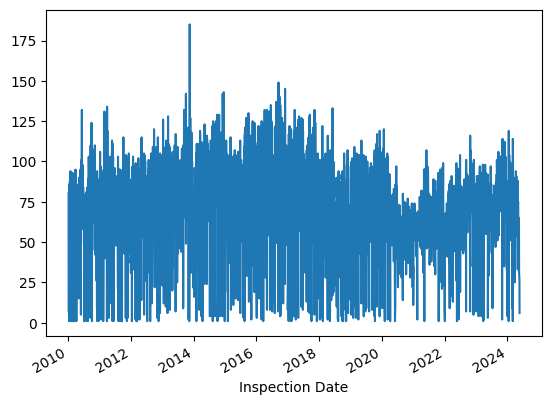

In [14]:
df.groupby('Inspection Date').size().plot()

# Data Analysis

## Results

In [15]:
results = df[['Inspection Date','Results']]

In [16]:
results.set_index('Inspection Date',inplace=True)

In [17]:
results

,Results
Inspection Date,
2024-05-21,No Entry
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
...,...
2010-01-19,Fail
2010-01-26,Pass
2010-01-13,Fail


In [18]:
results

,Results
Inspection Date,
2024-05-21,No Entry
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
...,...
2010-01-19,Fail
2010-01-26,Pass
2010-01-13,Fail


In [19]:
diff_results = results.pivot_table(index='Inspection Date',columns='Results', aggfunc=len)
diff_results = diff_results.replace(np.nan,0)
diff_results

Results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
Inspection Date,,,,,,,
2010-01-04,0.0,2.0,0.0,0.0,0.0,5.0,0.0
2010-01-05,0.0,20.0,0.0,0.0,0.0,48.0,3.0
2010-01-06,0.0,26.0,0.0,0.0,0.0,50.0,5.0
2010-01-07,0.0,18.0,0.0,0.0,0.0,41.0,3.0
2010-01-08,0.0,8.0,0.0,0.0,0.0,32.0,3.0
...,...,...,...,...,...,...,...
2024-05-16,0.0,11.0,1.0,2.0,3.0,27.0,3.0
2024-05-17,0.0,8.0,3.0,0.0,0.0,16.0,3.0
2024-05-20,0.0,5.0,1.0,0.0,2.0,14.0,6.0


In [20]:
results

,Results
Inspection Date,
2024-05-21,No Entry
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
2024-05-21,Pass
...,...
2010-01-19,Fail
2010-01-26,Pass
2010-01-13,Fail


<Axes: xlabel='Inspection Date'>

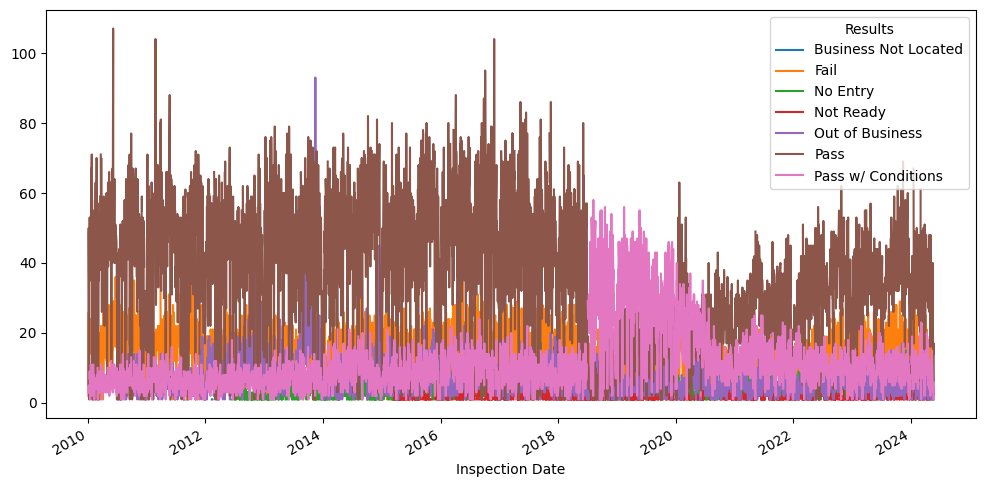

In [21]:
df[['Inspection Date','Results']].groupby(['Inspection Date','Results']).size().unstack().plot(figsize=(12, 6))

<Axes: xlabel='Inspection Date'>

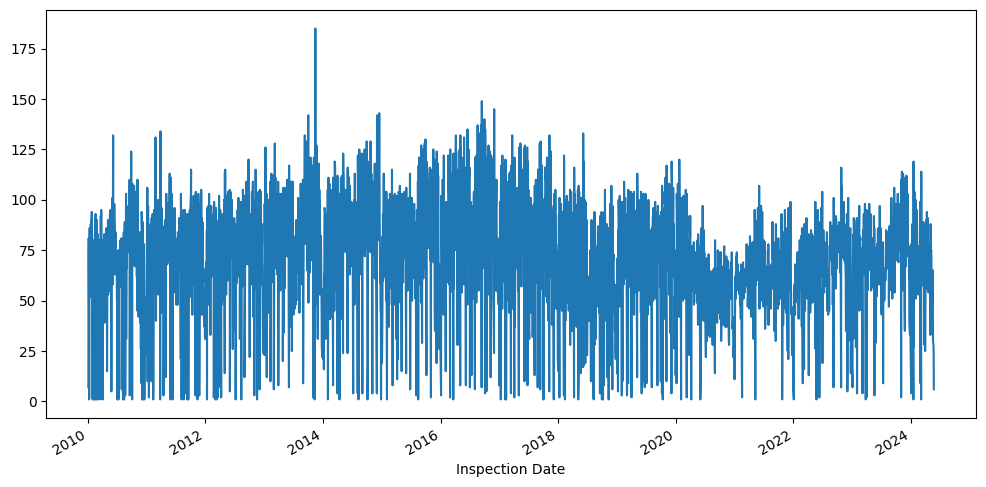

In [22]:
results.groupby(results.index).size().plot(figsize=(12, 6))

In [23]:
diff_results['Not Inspected']=diff_results[['Business Not Located','No Entry','Not Ready','Out of Business']].sum(axis=1)
col =['Pass','Pass w/ Conditions','Fail','Not Inspected']
diff_results = diff_results[col]

In [24]:
diff_results

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2010-01-04,5.0,0.0,2.0,0.0
2010-01-05,48.0,3.0,20.0,0.0
2010-01-06,50.0,5.0,26.0,0.0
2010-01-07,41.0,3.0,18.0,0.0
2010-01-08,32.0,3.0,8.0,0.0
...,...,...,...,...
2024-05-16,27.0,3.0,11.0,6.0
2024-05-17,16.0,3.0,8.0,3.0
2024-05-20,14.0,6.0,5.0,3.0


### Get different inspection results in 2020

In [25]:
year_2020 = diff_results[diff_results.index.year == 2020]

In [26]:
year_2020

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2020-01-02,6.0,7.0,7.0,5.0
2020-01-03,17.0,30.0,17.0,11.0
2020-01-06,1.0,4.0,2.0,2.0
2020-01-07,27.0,40.0,16.0,20.0
2020-01-08,35.0,25.0,24.0,13.0
...,...,...,...,...
2020-12-24,9.0,6.0,3.0,9.0
2020-12-28,11.0,3.0,6.0,7.0
2020-12-29,11.0,6.0,4.0,8.0


### Get different monthly inspection results in 2020
Creat a dataframe **year_2020_byMonth** to indicate the number inspection of each month in 2020

In [27]:
year_2020_byMonth = year_2020.groupby(by=year_2020.index.month).sum()
year_2020_byMonth

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
1,665.0,488.0,363.0,209.0
2,527.0,351.0,285.0,164.0
3,533.0,464.0,292.0,292.0
4,338.0,454.0,250.0,243.0
5,390.0,410.0,271.0,228.0
6,345.0,390.0,268.0,199.0
7,461.0,283.0,196.0,167.0
8,438.0,255.0,199.0,160.0
9,589.0,265.0,224.0,159.0


Line plot to show total inspection numbers over years
Draw a line plot to show the total inspections of every month from Jan. 2000 to April 2021.

In [28]:
diff_results.index.year.min()

2010

In [29]:
results_2000_2021=diff_results[(diff_results.index >= '2000-01-01') & (diff_results.index <= '2021-04-30')]
results_2000_2021

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2010-01-04,5.0,0.0,2.0,0.0
2010-01-05,48.0,3.0,20.0,0.0
2010-01-06,50.0,5.0,26.0,0.0
2010-01-07,41.0,3.0,18.0,0.0
2010-01-08,32.0,3.0,8.0,0.0
...,...,...,...,...
2021-04-26,28.0,20.0,9.0,14.0
2021-04-27,41.0,8.0,19.0,10.0
2021-04-28,11.0,4.0,8.0,8.0


In [30]:
results_2000_2021['Results']=results_2000_2021.sum(axis=1)
results_2000_2021

C:\Users\promi\AppData\Local\Temp\ipykernel_33596\2777995556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2000_2021['Results']=results_2000_2021.sum(axis=1)


Results,Pass,Pass w/ Conditions,Fail,Not Inspected,Results
Inspection Date,,,,,
2010-01-04,5.0,0.0,2.0,0.0,7.0
2010-01-05,48.0,3.0,20.0,0.0,71.0
2010-01-06,50.0,5.0,26.0,0.0,81.0
2010-01-07,41.0,3.0,18.0,0.0,62.0
2010-01-08,32.0,3.0,8.0,0.0,43.0
...,...,...,...,...,...
2021-04-26,28.0,20.0,9.0,14.0,71.0
2021-04-27,41.0,8.0,19.0,10.0,78.0
2021-04-28,11.0,4.0,8.0,8.0,31.0


In [31]:
results_2000_2021=results_2000_2021.groupby(pd.Grouper(freq='M')).sum()
results_2000_2021

C:\Users\promi\AppData\Local\Temp\ipykernel_33596\586550280.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_2000_2021=results_2000_2021.groupby(pd.Grouper(freq='M')).sum()


Results,Pass,Pass w/ Conditions,Fail,Not Inspected,Results
Inspection Date,,,,,
2010-01-31,851.0,97.0,330.0,1.0,1279.0
2010-02-28,954.0,103.0,342.0,0.0,1399.0
2010-03-31,1011.0,117.0,350.0,2.0,1480.0
2010-04-30,939.0,98.0,400.0,1.0,1438.0
2010-05-31,1030.0,122.0,389.0,1.0,1542.0
...,...,...,...,...,...
2020-12-31,440.0,195.0,173.0,236.0,1044.0
2021-01-31,481.0,239.0,199.0,221.0,1140.0
2021-02-28,421.0,219.0,164.0,170.0,974.0


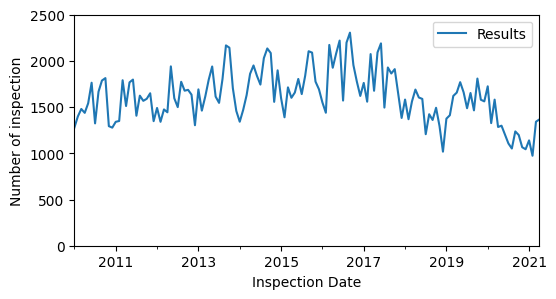

In [32]:
results_2000_2021['Results'].plot(figsize=(6,3), ylim=[0, 2500], ylabel='Number of inspection', legend=True);

In [33]:
# Sample visualization

## Bar plot for the inspection number in 2020

Draw a bar plot to show the number of different inspection results. 

The visualization should show different inspection results along the a-axis in 2020 and a bar showing the total number of inspections of each result type. 


In [34]:
results_2020=diff_results[diff_results.index.year == 2020]
results_2020

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2020-01-02,6.0,7.0,7.0,5.0
2020-01-03,17.0,30.0,17.0,11.0
2020-01-06,1.0,4.0,2.0,2.0
2020-01-07,27.0,40.0,16.0,20.0
2020-01-08,35.0,25.0,24.0,13.0
...,...,...,...,...
2020-12-24,9.0,6.0,3.0,9.0
2020-12-28,11.0,3.0,6.0,7.0
2020-12-29,11.0,6.0,4.0,8.0


In [35]:
results_2020.sum()

Results
Pass                  5736.0
Pass w/ Conditions    3929.0
Fail                  2935.0
Not Inspected         2523.0
dtype: float64

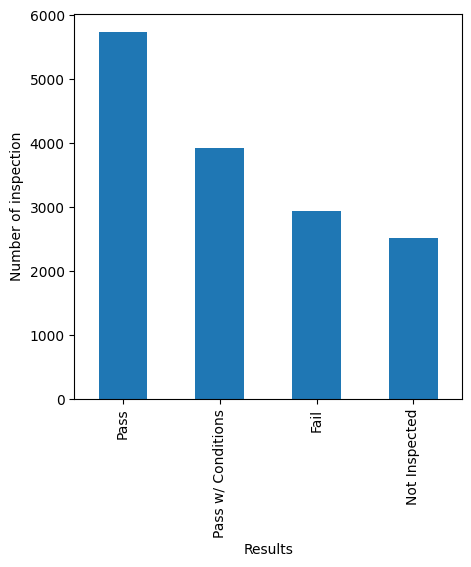

In [36]:
results_2020.sum().plot(kind='bar', figsize=(5,5), ylabel='Number of inspection');

In [37]:
# Sample visualization

## Stacked bar plot for different inspection results in 2020
Draw a stacked bar plot to show the number of inspections. 

1. The visualization should show each month along the a-axis in 2020 and a bar showing the total number of attempted inspections of each month. 
2. The bar are split into different segaments by inspection results. 
3. A legend is created to describe the map from colors to results.

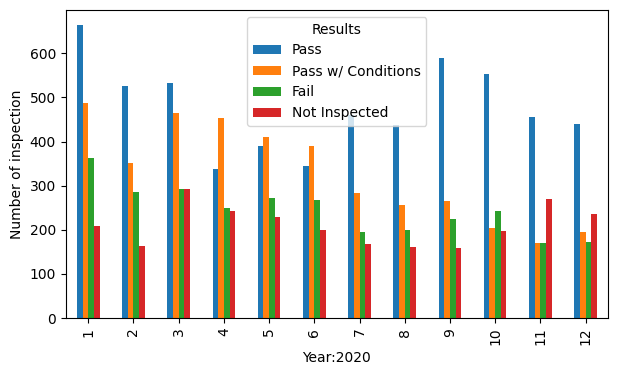

In [38]:
results_2020.groupby(results_2020.index.month).sum().plot(kind='bar', figsize=(7,4), 
                                                          ylabel='Number of inspection',
                                                         xlabel='Year:2020');

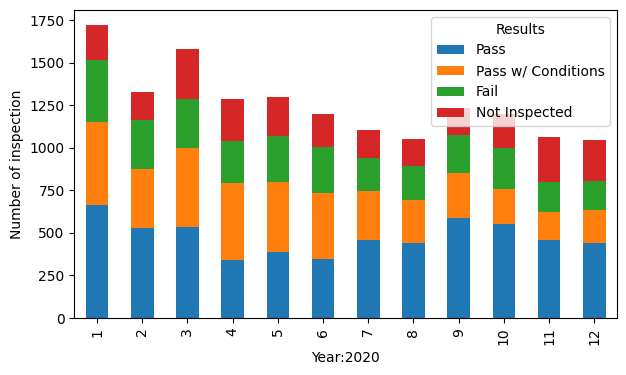

In [39]:
results_2020.groupby(results_2020.index.month).sum().plot(kind='bar', 
                                                          figsize=(7,4), 
                                                          ylabel='Number of inspection',
                                                          xlabel='Year:2020',
                                                         stacked=True);

In [40]:
# Sample visualization


## Tell story using data visualization
Given this data set, what observation do you want to explore? What question do you want to answer?

Except the bar plot and the line plot, select one idiom we discussed in class for visualizing the tabular data set to express one observation or answer to your question. 

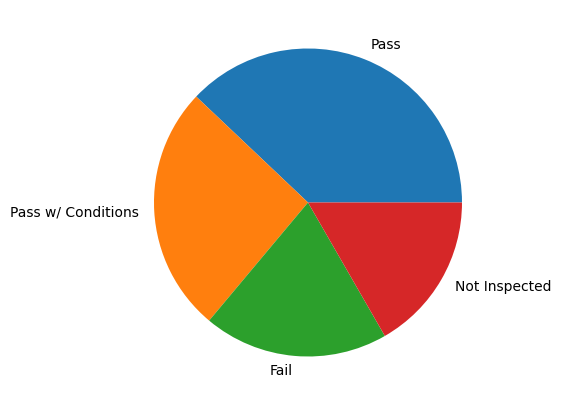

In [41]:
results_2020.sum().plot(kind='pie', figsize=(5,5));

In [42]:
results_2000_2021=results_2000_2021.groupby(pd.Grouper(freq='M')).sum()

C:\Users\promi\AppData\Local\Temp\ipykernel_33596\331612798.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_2000_2021=results_2000_2021.groupby(pd.Grouper(freq='M')).sum()


In [43]:
results_2000_2021

Results,Pass,Pass w/ Conditions,Fail,Not Inspected,Results
Inspection Date,,,,,
2010-01-31,851.0,97.0,330.0,1.0,1279.0
2010-02-28,954.0,103.0,342.0,0.0,1399.0
2010-03-31,1011.0,117.0,350.0,2.0,1480.0
2010-04-30,939.0,98.0,400.0,1.0,1438.0
2010-05-31,1030.0,122.0,389.0,1.0,1542.0
...,...,...,...,...,...
2020-12-31,440.0,195.0,173.0,236.0,1044.0
2021-01-31,481.0,239.0,199.0,221.0,1140.0
2021-02-28,421.0,219.0,164.0,170.0,974.0


In [44]:
results_2000_2021[results_2000_2021['Pass']<600]

Results,Pass,Pass w/ Conditions,Fail,Not Inspected,Results
Inspection Date,,,,,
2018-07-31,146.0,651.0,211.0,199.0,1207.0
2018-08-31,118.0,812.0,270.0,223.0,1423.0
2018-09-30,155.0,762.0,253.0,191.0,1361.0
2018-10-31,238.0,761.0,251.0,243.0,1493.0
2018-11-30,234.0,624.0,233.0,204.0,1295.0
2018-12-31,174.0,500.0,160.0,184.0,1018.0
2019-01-31,295.0,629.0,239.0,212.0,1375.0
2019-02-28,274.0,671.0,278.0,189.0,1412.0
2019-03-31,380.0,720.0,314.0,207.0,1621.0


C:\Users\promi\AppData\Local\Temp\ipykernel_33596\1426432940.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  diff_results.groupby(pd.Grouper(freq='M')).sum().plot( figsize=(10,4),


<Axes: xlabel='Year:2020', ylabel='Number of inspection'>

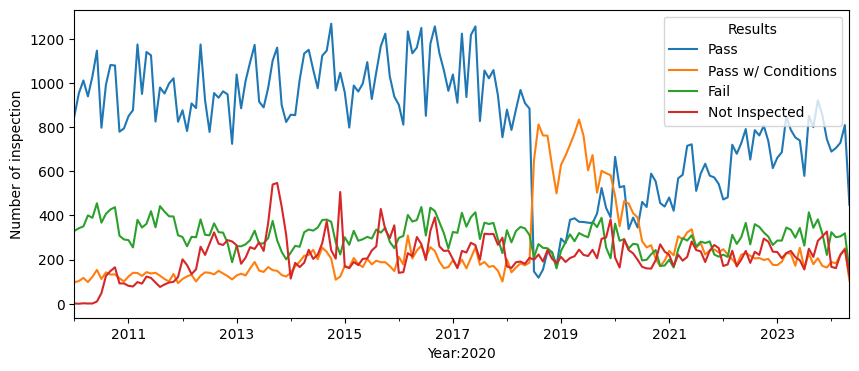

In [45]:
diff_results.groupby(pd.Grouper(freq='M')).sum().plot( figsize=(10,4), 
                                                          ylabel='Number of inspection',
                                                         xlabel='Year:2020')

Btween 2010 - 2018 the number of Passes is significantly Higher than the others.\
In July 2018 we observe a drop in the number of pass inspections which was followed by an increase in the number of passes with conditon.This can be explained by the change to food inspection procedures that affects the data in this dataset.The changes resulted in additional conditions for inspections to be passed.



In [46]:
df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# Risk

In [47]:
df['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', 'All', nan],
      dtype=object)

In [48]:
df['Risk'].isna().sum()

81

In [49]:
risk=df[['Inspection Date', 'Risk']]
risk.set_index('Inspection Date', inplace=True)
risk

,Risk
Inspection Date,
2024-05-21,Risk 1 (High)
2024-05-21,Risk 1 (High)
2024-05-21,Risk 3 (Low)
2024-05-21,Risk 3 (Low)
2024-05-21,Risk 3 (Low)
...,...
2010-01-19,Risk 3 (Low)
2010-01-26,Risk 1 (High)
2010-01-13,Risk 2 (Medium)


In [50]:
diff_risk = risk.pivot_table(index='Inspection Date',columns='Risk', aggfunc=len)
diff_risk = diff_risk.replace(np.nan,0)
diff_risk

Risk,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
Inspection Date,,,,
2010-01-04,0.0,6.0,1.0,0.0
2010-01-05,0.0,48.0,12.0,11.0
2010-01-06,0.0,48.0,25.0,8.0
2010-01-07,0.0,40.0,16.0,6.0
2010-01-08,0.0,26.0,13.0,4.0
...,...,...,...,...
2024-05-16,0.0,28.0,10.0,9.0
2024-05-17,1.0,20.0,7.0,2.0
2024-05-20,0.0,22.0,1.0,5.0


C:\Users\promi\AppData\Local\Temp\ipykernel_33596\2507104755.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  diff_risk.groupby(pd.Grouper(freq='M')).sum().plot( figsize=(10,4),


<Axes: xlabel='Inspection Date', ylabel='Number of inspection'>

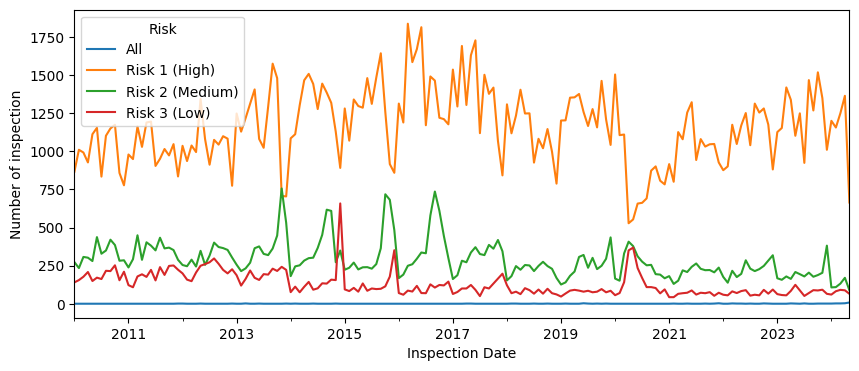

In [51]:
diff_risk.groupby(pd.Grouper(freq='M')).sum().plot( figsize=(10,4), 
                                                          ylabel='Number of inspection',
                                                         )

In 2014 there was a significant decrease in Risk2 and similiar trend is seen towards the end of the year.\
It is observed that there appears to be a drop bianully and followed by corresponding increase in the number of risk 2 recieved.\
From 2018 there was significant drop in no of Risk1.

# Risk Result
Based on the Risk 

In [52]:
results_risk=df[['Results', 'Risk']]
# results_risk.set_index('Inspection Date', inplace=True)
results_risk

,Results,Risk
0,No Entry,Risk 1 (High)
1,Pass,Risk 1 (High)
2,Pass,Risk 3 (Low)
3,Pass,Risk 3 (Low)
4,Pass,Risk 3 (Low)
...,...,...
272558,Fail,Risk 3 (Low)
272559,Pass,Risk 1 (High)
272560,Fail,Risk 2 (Medium)
272561,Pass,Risk 1 (High)


In [53]:
results_risk.pivot_table(index='Risk',columns='Results', aggfunc=len)

Results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
Risk,,,,,,,
All,1.0,5.0,11.0,36.0,10.0,NaN,NaN
Risk 1 (High),41.0,38836.0,9182.0,1957.0,12455.0,105799.0,31987.0
Risk 2 (Medium),24.0,9682.0,1385.0,913.0,5096.0,25220.0,7642.0
Risk 3 (Low),12.0,4735.0,420.0,575.0,5344.0,9256.0,1858.0


<Axes: xlabel='Risk'>

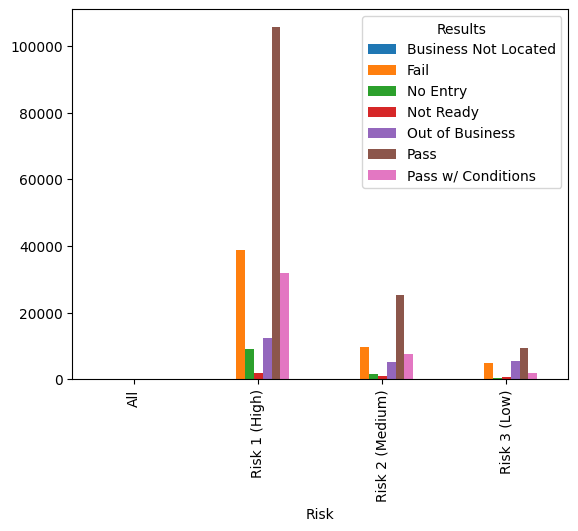

In [54]:
results_risk.pivot_table(index='Risk',columns='Results', aggfunc=len).plot(kind='bar')

Based on the Risk and Result Data , we can observe more Data for Risk1 we have more passes , \
followed by fail and Pass with condition.


# geospatial Data Analysis

In [56]:
good_restuarants=df[(df['Results']=='Pass') & (df['Facility Type']=='Restaurant')].copy()
# good_restuarants=good_restuarants.loc['2021-04']
good_restuarants

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
3,2594942,TAQUERIA EL HEREDERO II,TAQUERIA EL HEREDERO II,2917665.0,Restaurant,Risk 3 (Low),3619 W NORTH AVE,CHICAGO,IL,60647.0,2024-05-21,License,Pass,NaN,41.909874,-87.717533,"(41.90987366752682, -87.7175328988882)"
9,2594750,EL NUEVO PUERTO MARISCOS AND GRILL,EL NUEVO PUERTO MARISCOS AND GRILL,2664156.0,Restaurant,Risk 1 (High),2752 W LAWRENCE AVE,CHICAGO,IL,60625.0,2024-05-16,Canvass Re-Inspection,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.968645,-87.698286,"(41.968644613011605, -87.69828568537154)"
12,2594712,YOKOCHO,YOKOCHO,2896466.0,Restaurant,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,2024-05-16,Canvass Re-Inspection,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
14,2594652,UDUPI PALACE RESTAURANT,UDUPI PALACE RESTAURANT,30962.0,Restaurant,Risk 1 (High),2543 W DEVON AVE,CHICAGO,IL,60659.0,2024-05-15,Complaint Re-Inspection,Pass,NaN,41.997550,-87.694024,"(41.997550032960476, -87.69402394650278)"
16,2594637,CHECKERS/RALLY'S,CHECKERS,2881870.0,Restaurant,Risk 1 (High),6301 S ASHLAND AVE,CHICAGO,IL,60636.0,2024-05-15,License,Pass,NaN,41.779376,-87.664072,"(41.77937593571122, -87.66407209129771)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272553,114307,GILT BAR/DOUGHNUT VAULT,GILT BAR,1991379.0,Restaurant,Risk 1 (High),228-230 W KINZIE ST,CHICAGO,IL,60654.0,2010-01-26,Task Force Liquor 1475,Pass,NaN,41.889261,-87.635265,"(41.88926053865928, -87.63526544931696)"
272554,60265,UNCLE REMUS,UNCLE REMUS,1305369.0,Restaurant,Risk 1 (High),4144 W MADISON ST,CHICAGO,IL,60624.0,2010-01-20,Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.880785,-87.729864,"(41.88078470739971, -87.72986386402633)"
272555,120305,PRAIRIE FIRE,Prarie Fire,1991655.0,Restaurant,Risk 3 (Low),215 N CLINTON ST,CHICAGO,IL,60661.0,2010-01-21,License,Pass,NaN,41.886197,-87.641173,"(41.88619709923331, -87.6411730001049)"
272559,68152,BJ'S MARKET & BAKERY,BJ'S MARKET & BAKERY,1493350.0,Restaurant,Risk 1 (High),1156 W 79TH ST,CHICAGO,IL,60620.0,2010-01-26,Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.750608,-87.653595,"(41.750608293340875, -87.6535946380355)"


In [60]:
import folium
from folium.plugins import MarkerCluster

In [63]:
m = folium.Map(location=[41.9400, -87.6600], tiles="OpenStreetMap", zoom_start=12.5)

marker_cluster = MarkerCluster(name="Good Restaurants").add_to(m)


for row in good_restuarants.itertuples():
#     print(row)
    folium.Marker(location=[row.Latitude,row.Longitude],
                  popup=row.DBA_Name).add_to(marker_cluster)

folium.LayerControl().add_to(m)

In [64]:
import json
with open ('chicago.json.', 'r') as jsonFile:
    chicago = json.load(jsonFile)
chicago
good_restuarants.groupby('Zip')['DBA_Name'].count()
m = folium.Map(location=[41.8781, -87.6298], tiles="OpenStreetMap", zoom_start=10)


folium.Choropleth(
    geo_data=chicago,
    name="Good Restuarants",
    data=good_restuarants.groupby('Zip')['DBA_Name'].count(),
    columns=[ "DBA_Name"],
    key_on="feature.properties.ZIP",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Count of Good Restuarants",
).add_to(m)

folium.LayerControl().add_to(m)

# Display the Choropleth
m